In [15]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json 
import requests 
from config import api_key
from pytrends.request import TrendReq




pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(["bitcoin", "cryptocurrency", "Ethereum", "BTC", "ETH"], cat=0,  geo='', timeframe="today 5-y", gprop='')
# "XRP", "BCH", "ETH",
df = pytrends.interest_over_time()

df.to_csv('...\Cryptocurrency_analysis_project\Resources\Google_search.csv')
df.head()

,bitcoin,cryptocurrency,Ethereum,BTC,ETH,isPartial
date,,,,,,
2014-03-30,3,0,0,1,0,False
2014-04-06,3,0,0,1,0,False
2014-04-13,3,0,0,1,0,False
2014-04-20,3,0,0,1,0,False
2014-04-27,3,0,0,1,0,False


In [17]:

df.to_csv(r'/Users/alinas/Desktop/PREWORK_AS/ Cryptocurrency  project /Cryptocurrency_analysis_project/Google_search.csv')

In [22]:
file = "../Cryptocurrency_analysis_project/Resources/Google_search.csv"
df = pd.read_csv(file)
df.head()

,date,bitcoin,cryptocurrency,Ethereum,BTC,ETH
0,1/3/16,3,0,0,1,0
1,1/10/16,3,0,0,1,0
2,1/17/16,3,0,0,1,0
3,1/24/16,2,0,0,1,0
4,1/31/16,2,0,0,1,0


<IPython.core.display.Javascript object>


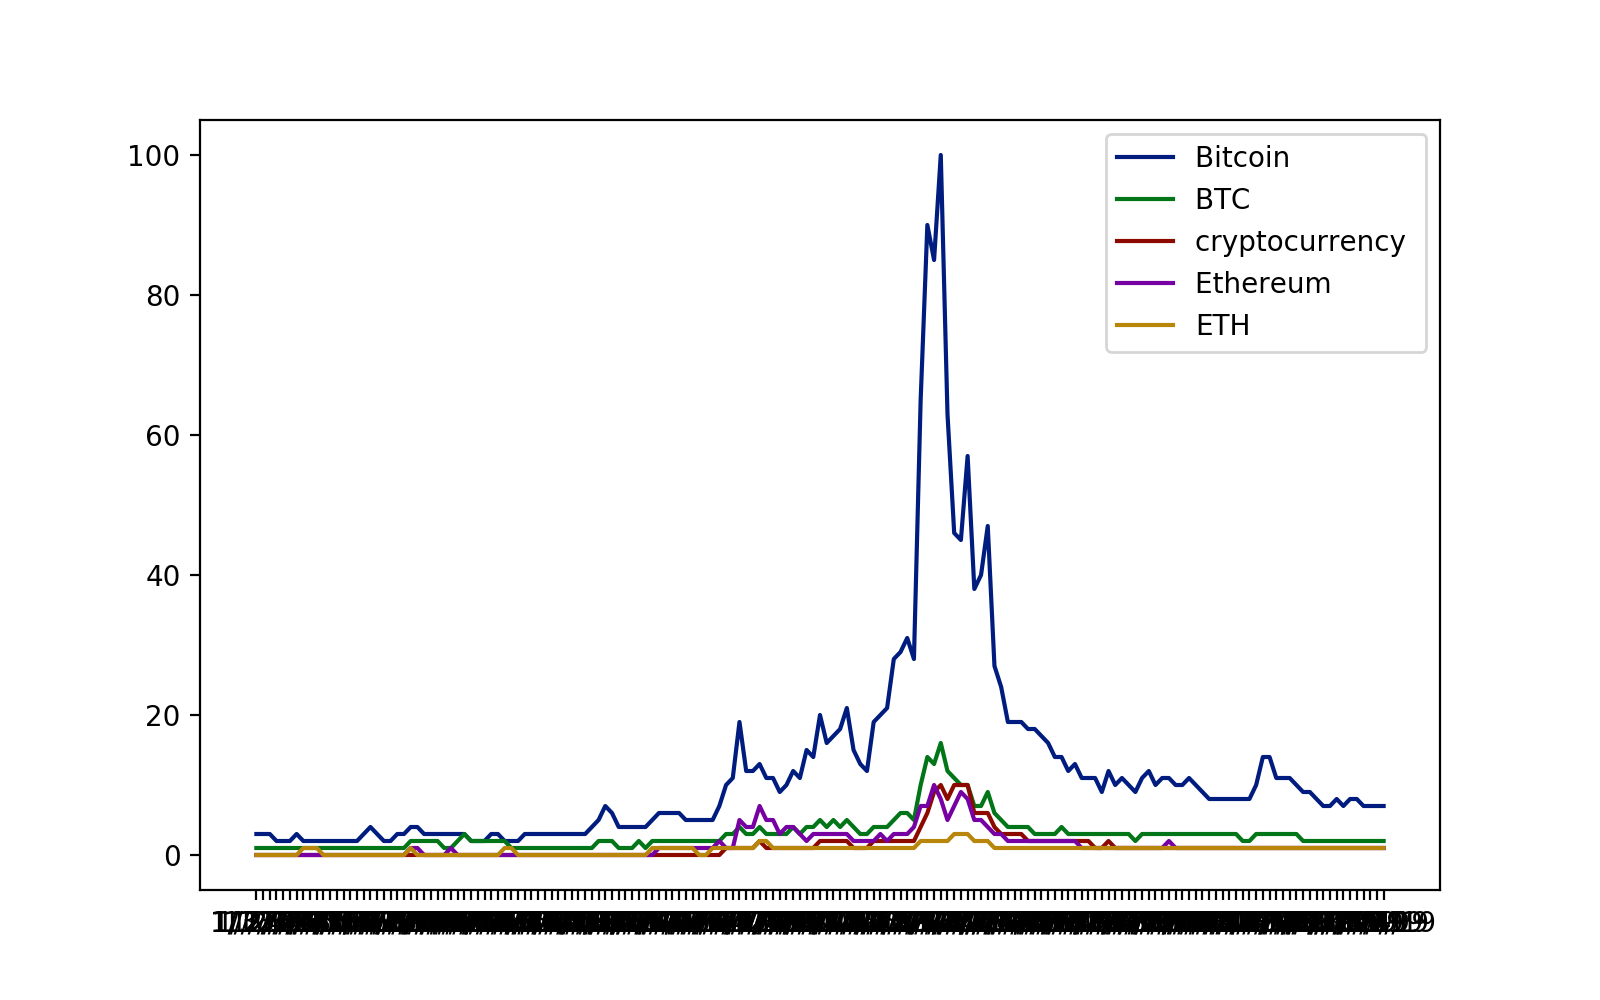

In [52]:
import datetime
import matplotlib.dates as mdates

idx = pd.date_range(df.iat[0,0],  df['date'].iloc[-1])
s = pd.Series(np.random.randn(len(idx)), index=idx)


fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
plt.style.use('seaborn-dark-palette')

# idx = pd.date_range(df.iat[0,0],  df['date'].iloc[-1])
# ax1.set_xticks([datetime.date(j,i,3) for i in range(1,13,2) for j in range(2016,2019)])
# ax1.set_xticklabels([datetime.date(j,i,3).strftime('%b -%Y') for i in range(1,13,2) for j in range(2016,2019)])
ax1.plot(df['date'].astype(datetime.datetime),
             df['bitcoin'], label='Bitcoin ', )
ax1.plot(df['date'].astype(datetime.datetime),
             df['BTC'], label="BTC ", )
ax1.plot(df['date'].astype(datetime.datetime),
             df['cryptocurrency'], label="cryptocurrency ", )
ax1.plot(df['date'].astype(datetime.datetime),
             df['Ethereum'], label="Ethereum ", )
ax1.plot(df['date'].astype(datetime.datetime),
             df['ETH'], label="ETH", )
ax1.legend(loc = "best")
plt.show()

In [58]:
from cryptory import Cryptory

my_cryptory = Cryptory(from_date = "2016-01-01")

# get historical bitcoin prices from coinmarketcap
bitcoin_df = my_cryptory.extract_coinmarketcap("bitcoin")
bitcoin_df.to_csv(r'/Users/alinas/Desktop/PREWORK_AS/ Cryptocurrency  project /Cryptocurrency_analysis_project/Resources/bitcoin_data.csv')


In [59]:
ethereum_df = my_cryptory.extract_coinmarketcap("Ethereum")
ethereum_df.to_csv(r'/Users/alinas/Desktop/PREWORK_AS/Cryptocurrency  project/Cryptocurrency_analysis_project/Resources/ethereum_data.csv')


In [60]:
litecoin_df = my_cryptory.extract_coinmarketcap("Litecoin")
litecoin_df.to_csv(r'/Users/alinas/Desktop/PREWORK_AS/ Cryptocurrency  project /Cryptocurrency_analysis_project/Resources/litecoin_data.csv')


In [72]:
coins_price_df = my_cryptory.extract_bitinfocharts("btc")
# coins of interest
coins_list = ["btc", "eth", "ltc", "doge","dash","xmr", "xrp"]
for coin in coins_list[1:]:
    coins_price_df = coins_price_df.merge(my_cryptory.extract_bitinfocharts(coin), on="date", how="left")
coins_price_df.head()


,date,btc_price,eth_price,ltc_price,doge_price,dash_price,xmr_price,xrp_price
0,2019-03-31,4105.0,141.409,60.300,0.00208,108.776,55.657,0.310
1,2019-03-30,4103.0,142.857,60.759,0.00208,97.687,53.643,0.313
2,2019-03-29,4080.0,140.268,60.964,0.00208,97.376,53.195,0.308
3,2019-03-28,4032.0,138.322,60.692,0.00206,94.092,52.920,0.310
4,2019-03-27,4014.0,137.827,60.631,0.00205,91.875,52.743,0.310


In [73]:
coins_price_df.to_csv(r'/Users/alinas/Desktop/PREWORK_AS/ Cryptocurrency  project /Cryptocurrency_analysis_project/Resources/crypto_prices_info.csv')


<IPython.core.display.Javascript object>


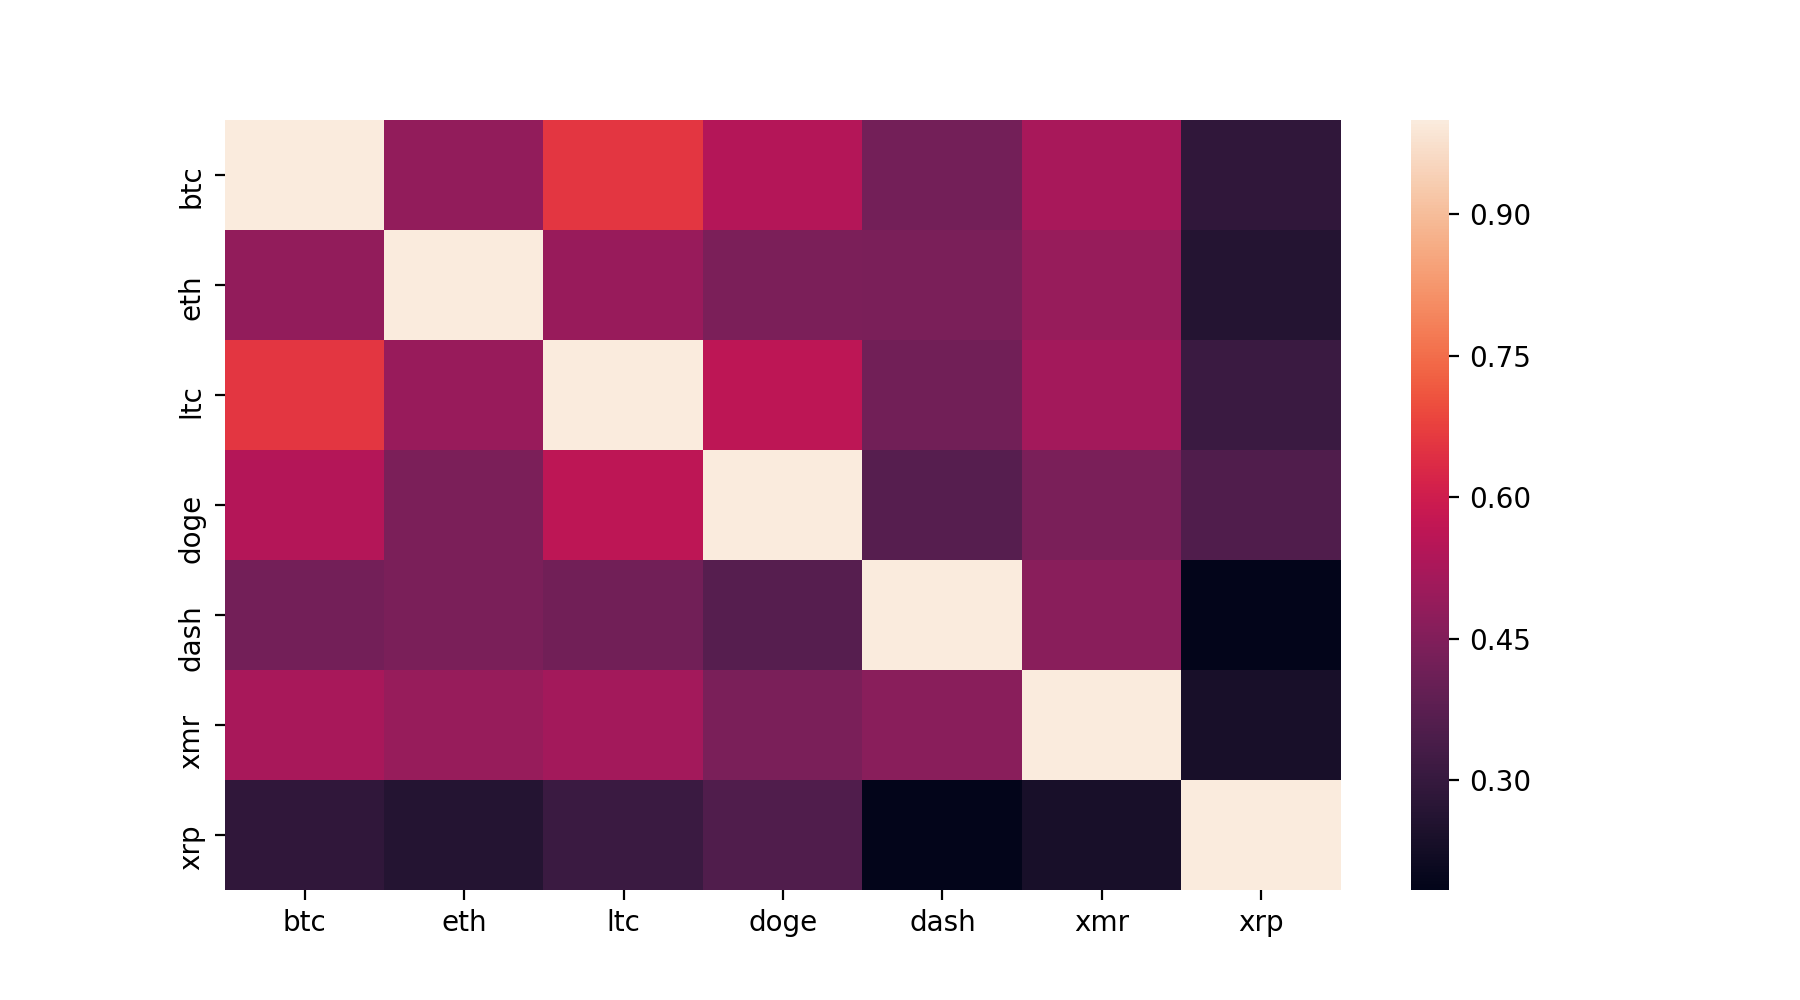

In [74]:

coins_price_df = coins_price_df.drop('date', axis=1)
corr = all_coins_df.pct_change().corr(method='pearson')
fig, ax = plt.subplots(figsize=(9,5))  
sns.heatmap(corr, 
            xticklabels=[col.replace("_price", "") for col in corr.columns.values],
            yticklabels=[col.replace("_price", "") for col in corr.columns.values],
            annot_kws={"size": 16})
plt.show()